In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
from ast import literal_eval
%matplotlib inline

In [2]:
model_name_to_full_name_dict = {'knn': 'k-Nearest Neighbors',
                                'ridge': 'Ridge',
                                'lasso': 'Lasso',
                                'svr - poly kernel':    'Support Vector Regression - Polynomial kernel',
                                'svr - rbf kernel':     'Support Vector Regression - Radial basis function kernel',
                                'svr - sigmoid kernel': 'Support Vector Regression - Sigmoid kernel'}

In [3]:
def heatmap_model_results(path):
    model_files = [x for x in os.listdir(path) if x.endswith('csv')]
    
    out_folder = 'figures/' + path[8:] # 'figures/' + 2nd and 3rd subfolders of path
    
    if not os.path.exists(out_folder):
        os.makedirs(out_folder)
    
    for model_file in model_files:
        if 'ols' in model_file: # don't bother with OLS results since they weren't pre-reg'd and are very inaccurate
            continue
            
        plt.subplots(figsize=(14,12));
        model_results = pd.read_csv(path+model_file, index_col=0)
        model_results['average'] = model_results.mean(axis='columns')
        model_results = model_results.loc[:,['average']+list(model_results.columns[:-1])]
        
        # simplify x-ticks...
        new_indices = []
        for hyper_dict_as_str in model_results.index:
            hyper_dict = literal_eval(hyper_dict_as_str)
            hyper_dict.pop('kernel', None)
            new_index = list(hyper_dict.values())[0]
            new_indices.append(new_index)

        model_results.index = new_indices
        hyperparameter = list(hyper_dict.keys())[0]
        if 'rsquared' in path:
            ax = sns.heatmap(model_results.T, vmin=0, vmax=1, annot=True, cmap="Blues", cbar_kws={'label': 'R-squared'}, annot_kws={"size": 15})
        elif 'rmse' in path:
            ax = sns.heatmap(model_results.T, vmin=0, annot=True, cmap="Blues_r", cbar_kws={'label': 'Root mean squared error'}, annot_kws={"size": 15})
        ax.tick_params(labelsize=15)
        cbar_axes = ax.figure.axes[-1]
        cbar_axes.yaxis.label.set_size(18)
        cbar_axes.tick_params(labelsize=15)

        if hyperparameter == 'alpha':
            hyperparameter = 'λ'
        if hyperparameter == 'n_neighbors':
            hyperparameter = 'k'
            
        plt.xlabel(hyperparameter, rotation='horizontal', fontsize=14)
        
        output_file_name = model_file[:-4]
        model_name = output_file_name.split('_')[0]

        if model_name != 'knn':
            plt.xticks(rotation=45);
        
        if model_name == 'svr':
            possible_kernel = output_file_name.split('_')[1]
            if possible_kernel == 'all':
                possible_kernel = 'rbf'
            model_name += ' - ' + possible_kernel + ' kernel'
        
        model_name = model_name_to_full_name_dict[model_name]
        
        plt.title(model_name, fontsize=20)
        plt.savefig(out_folder + f'{output_file_name}.png')
        plt.show()

knn_all_judgments.csv


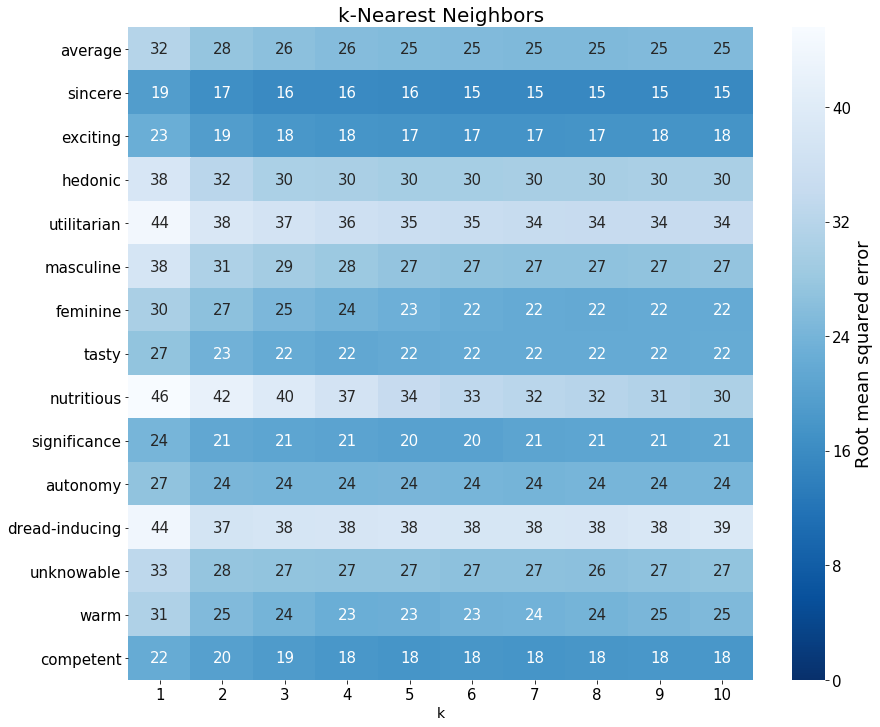

ridge_all_judgments.csv


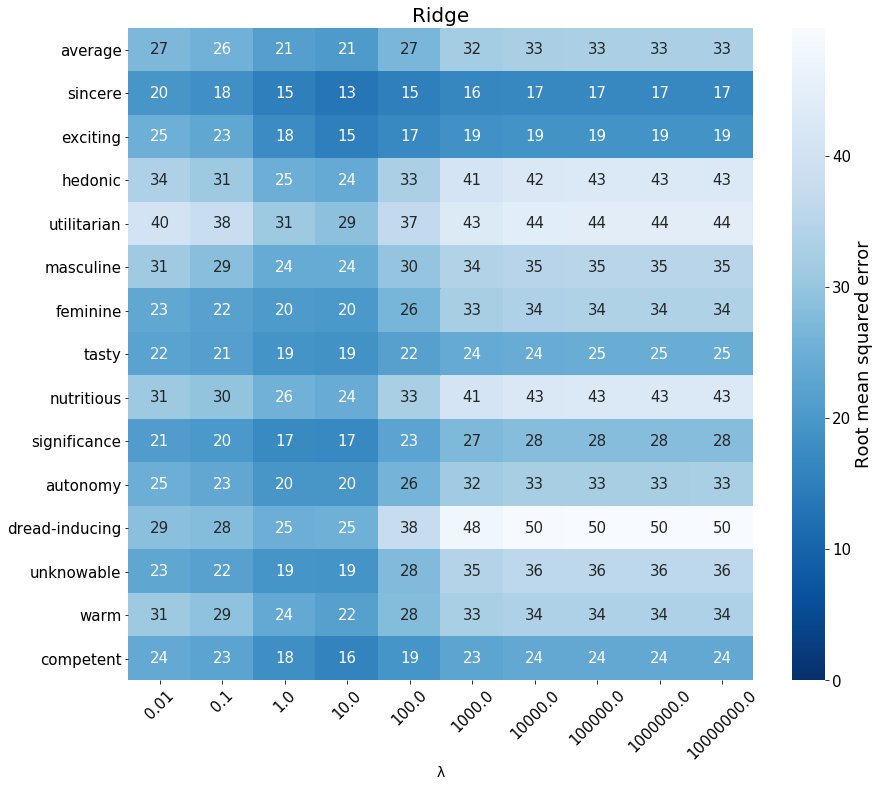

ols_all_judgments.csv
svr_poly_all_judgments.csv


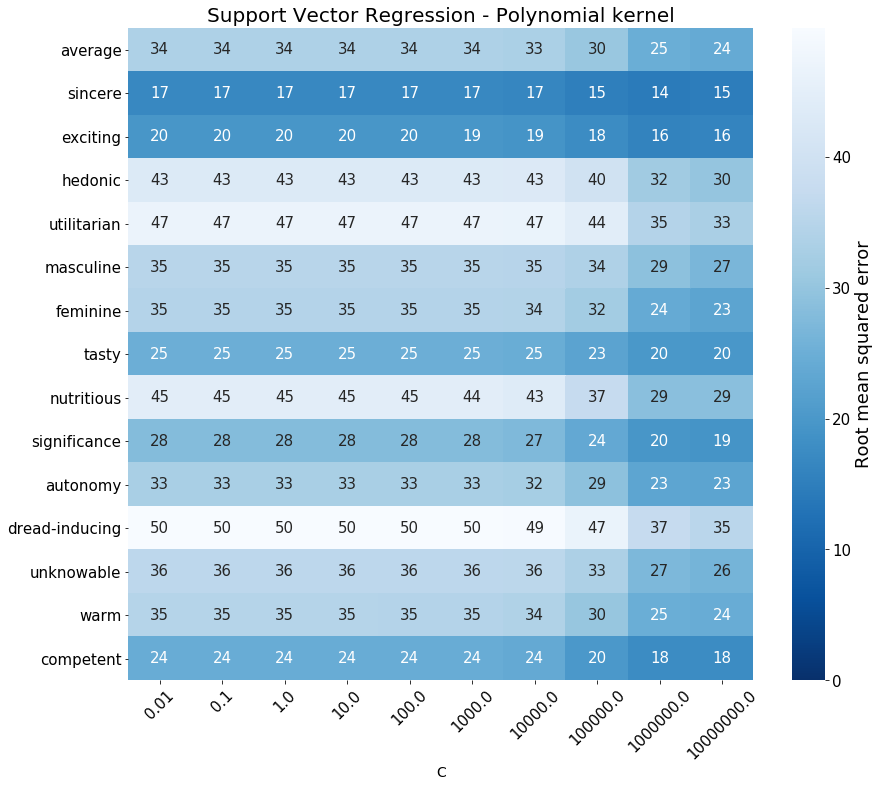

svr_all_judgments.csv


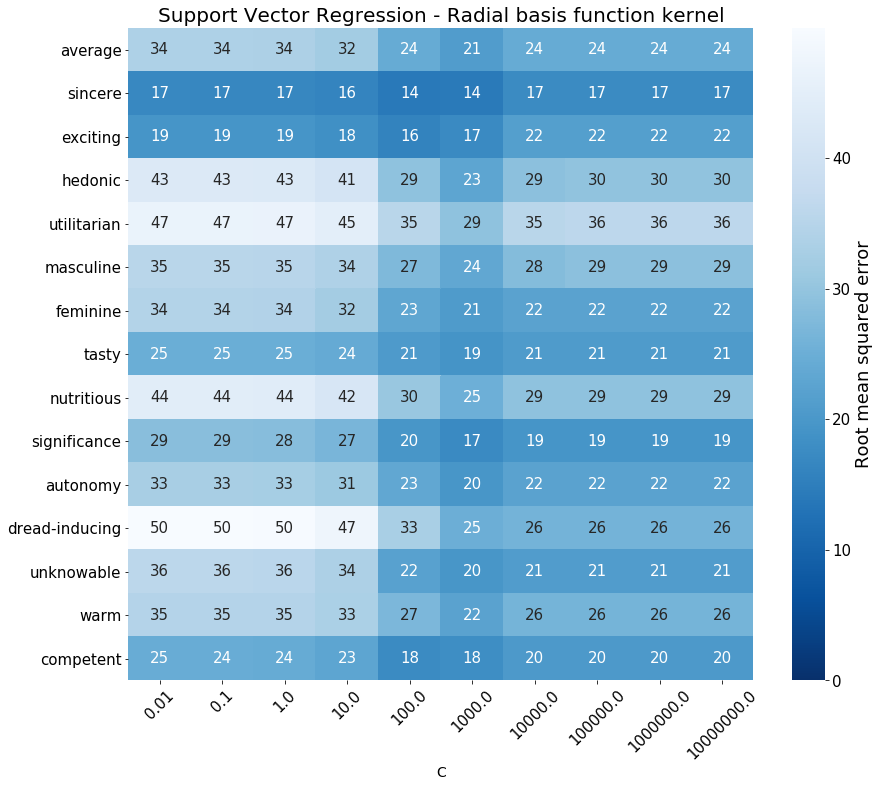

lasso_all_judgments.csv


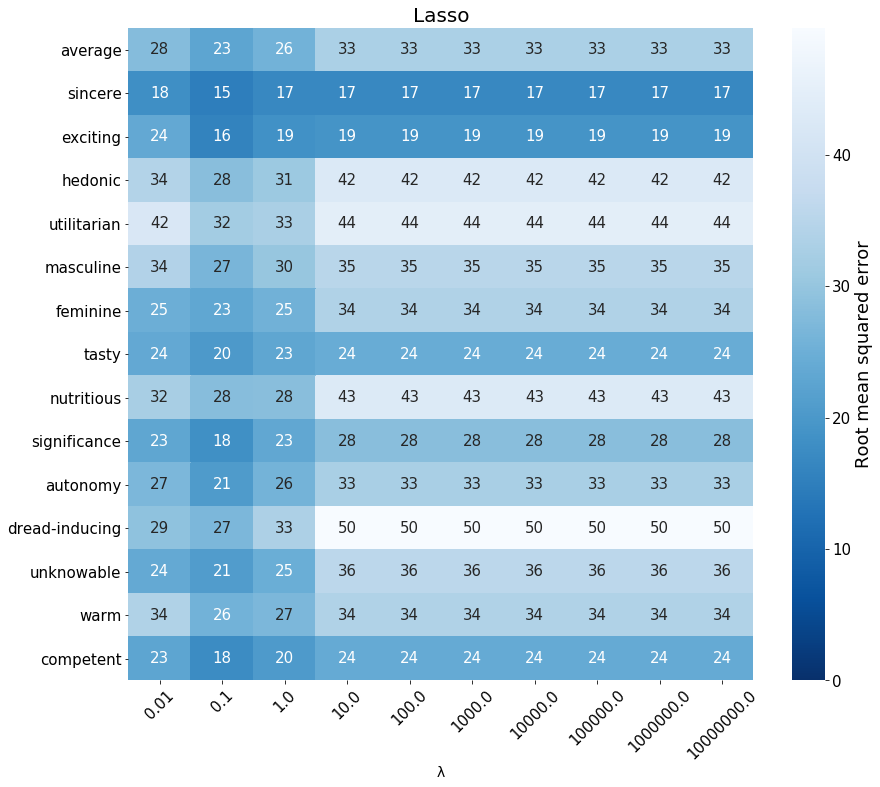

svr_sigmoid_all_judgments.csv


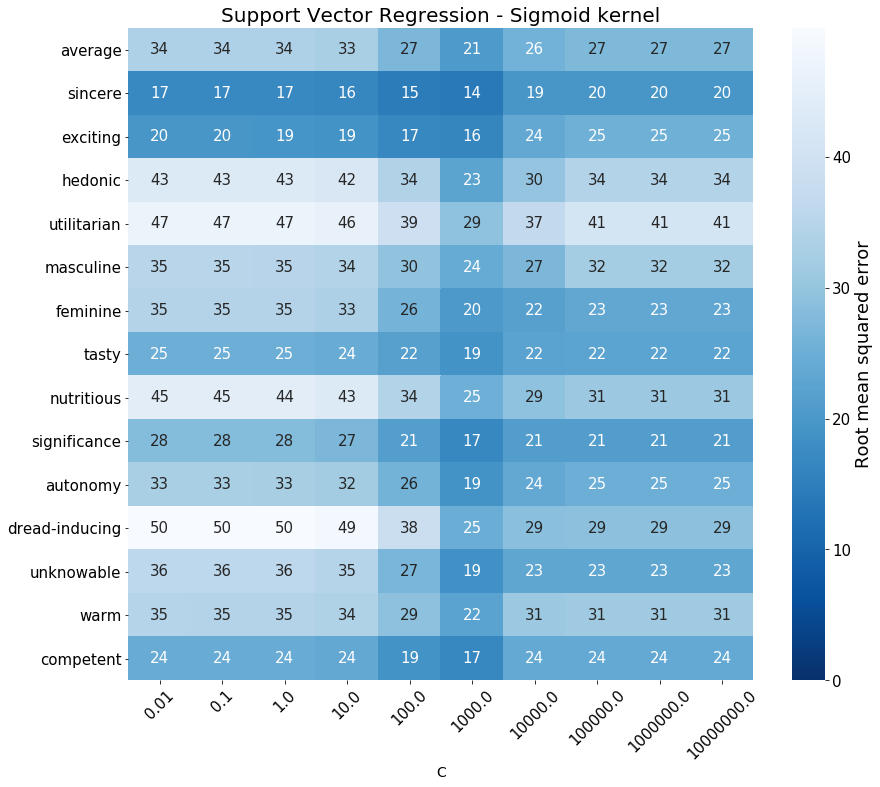

In [4]:
word2vec_r2_path = 'results/preregistered_models/rmse/'

heatmap_model_results(word2vec_r2_path)

knn_all_judgments.csv


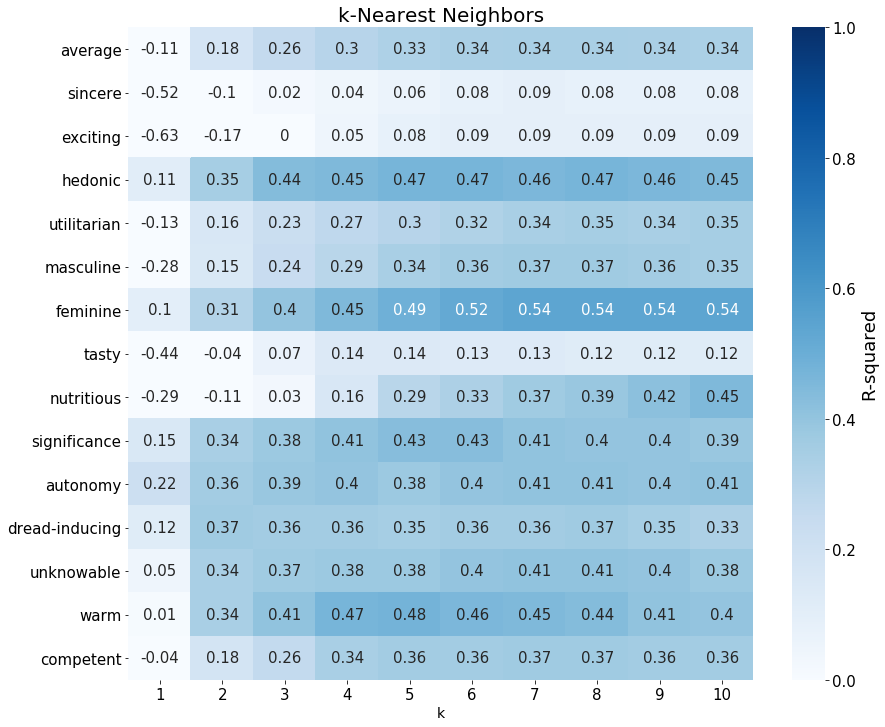

ridge_all_judgments.csv


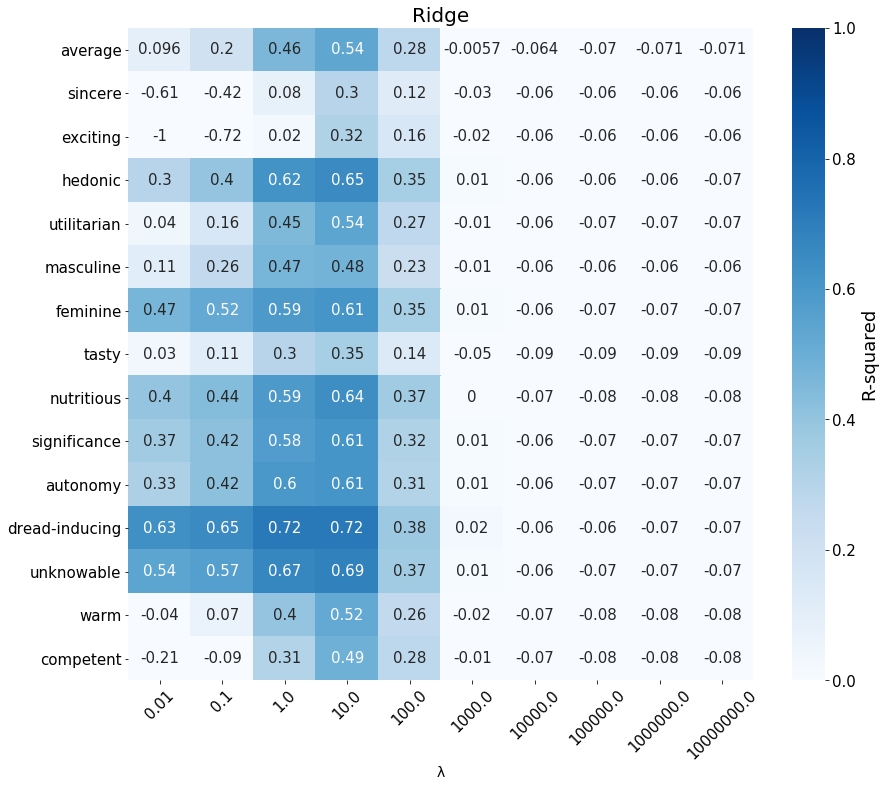

ols_all_judgments.csv
svr_poly_all_judgments.csv


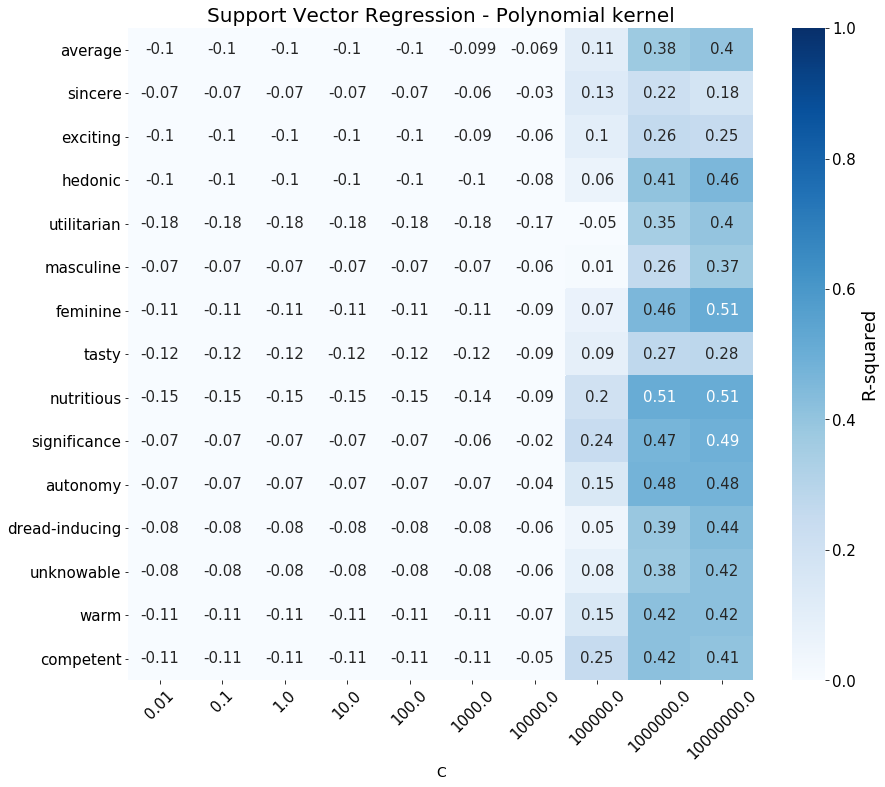

svr_all_judgments.csv


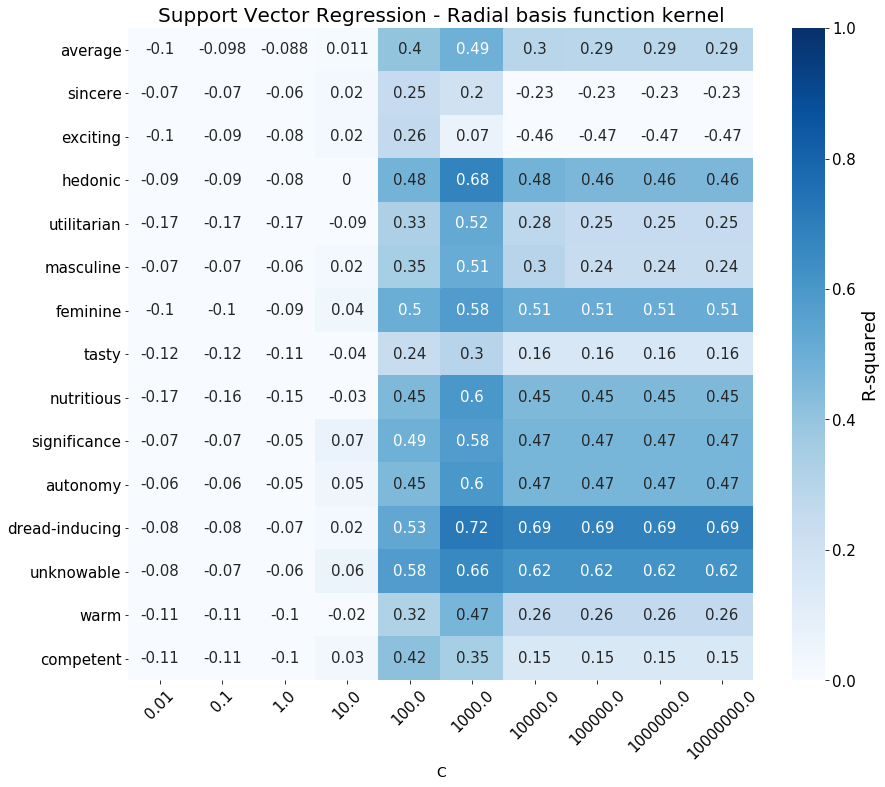

lasso_all_judgments.csv


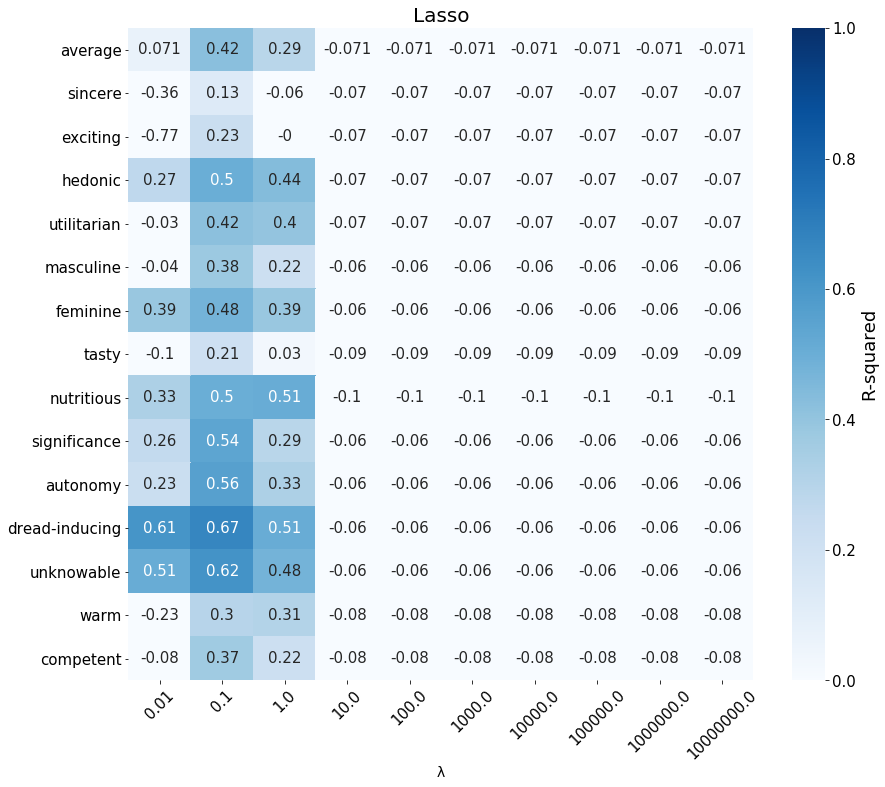

svr_sigmoid_all_judgments.csv


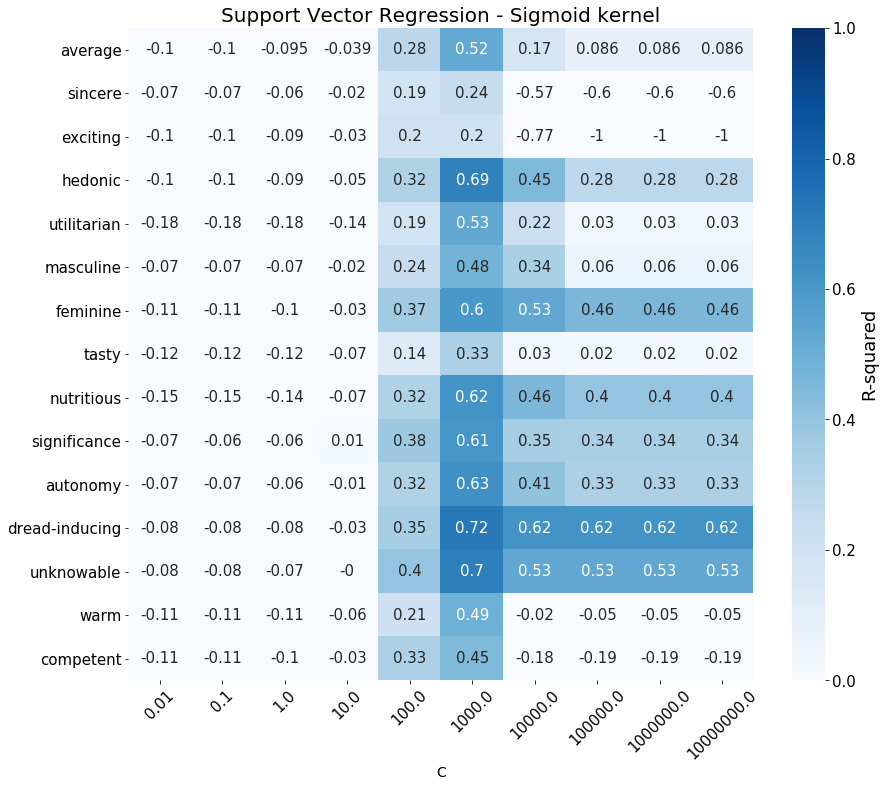

In [5]:
word2vec_r2_path = 'results/preregistered_models/rsquared/'

heatmap_model_results(word2vec_r2_path)